# Transfer Learning VGG19 

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'coffee-datasets/symptom/train'
valid_path = 'coffee-datasets/symptom/test'

In [4]:
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [6]:
folders = glob('coffee-datasets/symptom/train/*')

In [7]:
x = Flatten()(vgg19.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [9]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('coffee-datasets/symptom/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1539 images belonging to 5 classes.


In [13]:
test_set = test_datagen.flow_from_directory('coffee-datasets/symptom/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 335 images belonging to 5 classes.


In [14]:

# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
49/49 [==============================] - 318s 6s/step - loss: 1.2359 - accuracy: 0.5815 - val_loss: 0.7814 - val_accuracy: 0.7194
Epoch 2/10
49/49 [==============================] - 321s 7s/step - loss: 0.6690 - accuracy: 0.7381 - val_loss: 0.5944 - val_accuracy: 0.7642
Epoch 3/10
49/49 [==============================] - 318s 6s/step - loss: 0.4923 - accuracy: 0.8291 - val_loss: 0.7250 - val_accuracy: 0.7104
Epoch 4/10
49/49 [==============================] - 310s 6s/step - loss: 0.4822 - accuracy: 0.8291 - val_loss: 0.5088 - val_accuracy: 0.8030
Epoch 5/10
49/49 [==============================] - 303s 6s/step - loss: 0.4002 - accuracy: 0.8655 - val_loss: 0.4967 - val_accuracy: 0.7940
Epoch 6/10
49/49 [==============================] - 304s 6s/step - loss: 0.3742 - accuracy: 0.8622 - val_loss: 0.5663 - val_accuracy: 0.7642
Epoch 7/10
49/49 [==============================] - 312s 6s/step - loss: 0.324

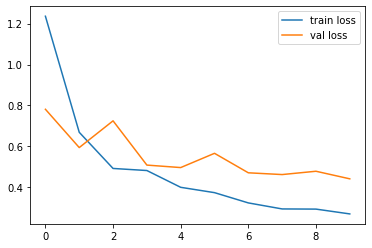

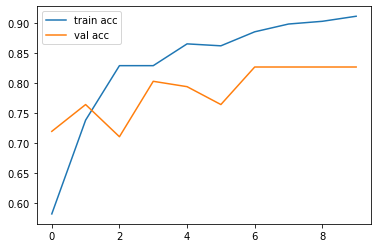

<Figure size 432x288 with 0 Axes>

In [15]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('vgg19LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('vgg19AccVal_acc')

In [16]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [17]:

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model=load_model('model_vgg19.h5')

In [18]:

import cv2
import tensorflow as tf
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    new_array = cv2.resize(img_array, (224, 224))
    return new_array.reshape(-1, 224, 224, 3)

model = tf.keras.models.load_model("model_vgg19.h5")

In [19]:
prediction = model.predict([prepare("coffee-datasets/symptom/test/2_miner/23.JPG")])
if np.argmax(prediction) == 0:
    print("health")
elif np.argmax(prediction) == 1:
    print("miner")
elif np.argmax(prediction) == 2:
    print("rust")
elif np.argmax(prediction) == 3:
    print("phoma")
else:
    print("cercospora")

miner


## Thank You